In [21]:
# !pip install wheel==0.38.4
# !pip install setuptools==65
# !pip install gym==0.21
# !pip list

In [22]:
# for saving and training models

loading = True
training = True

In [23]:
from IPython.display import clear_output
from PIL import Image
import matplotlib.pyplot as plt
import gym
import torch
import numpy as np

In [24]:
env = gym.make("ALE/Assault-v5").env

n_actions = env.action_space.n # see more info in actions.txt

print("n_actions=", n_actions)

gym.version.VERSION

n_actions= 7


'0.21.0'

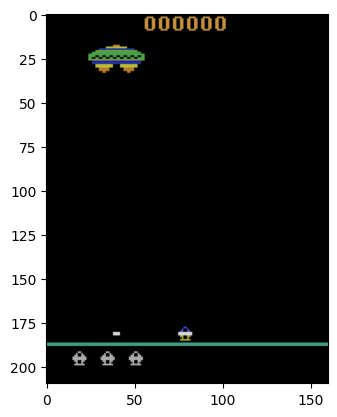

In [25]:
import matplotlib.pyplot as plt

state = env.reset() # state - здесь изображение

height, width, num_channels = state.shape

plt.imshow(state) # здесь можно убрать лишние пиксели, но пока пофиг

Архитектура Нейронной сети

In [26]:
# реализована в файлах Model.py and Agent.py

import Model
from Agent import Agent, get_img_as_tensor

agent = Agent(num_channels=num_channels, height=height, width=width, n_actions=n_actions) 

In [27]:
from PIL import Image 

print(agent.model(get_img_as_tensor(state).unsqueeze(0)))

tensor([[ 0.0143, -0.0772, -0.0829,  0.0408,  0.0115, -0.2943,  0.2159]],
       grad_fn=<AddmmBackward0>)


## Функция ошибки!!!!

In [28]:
from IPython.display import clear_output
from tqdm import trange

## get action

In [29]:
# realized in Agent.get_action

Обучение нейронной сети.

epoch #385	mean reward = 365.400	epsilon = 0.002


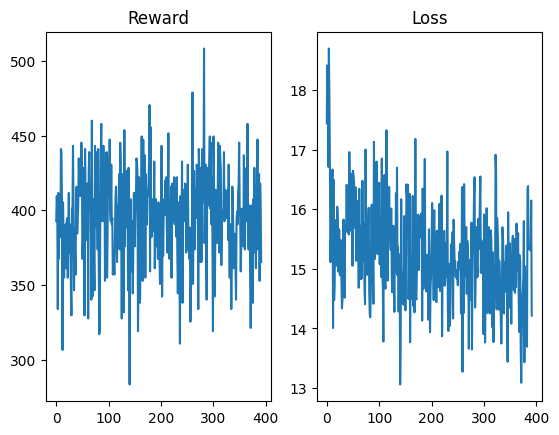

In [31]:
from IPython.display import clear_output

import matplotlib.pyplot as plt

x = []
y = []


if loading:
    losses = np.load("loss_mean.npy",allow_pickle=True).tolist()
    y = np.load("reward_mean.npy",allow_pickle=True).tolist()
    x = np.load("log.npy",allow_pickle=True).tolist()
    agent.load()

if training:
    for i in range(1000):
        if i % 2 == 1:
            agent.save()
            np.save("loss_mean.npy", losses)
            np.save("reward_mean.npy", y)
            np.save("log.npy", x)
        
        session_rewards = [generate_session(env=env, agent=agent, epsilon=agent.epsilon, train=True) for _ in trange(10)]
        losses.append(np.mean(L))
        L = []

        clear_output(True)
        print("epoch #{}\tmean reward = {:.3f}\tepsilon = {:.3f}".format(i, np.mean(session_rewards), agent.epsilon))

        agent.epsilon *= 0.99

        if agent.epsilon < 0.001:
            agent.epsilon = 0.1
        assert agent.epsilon >= 1e-4, "Make sure epsilon is always nonzero during training"

        x.append(len(x))
        y.append(np.mean(session_rewards))

        fig, axs = plt.subplots(ncols=2)
        
        axs[0].set_title("Reward")
        axs[0].plot(x, y)

        axs[1].set_title("Loss")
        axs[1].plot(x, losses)

        plt.show()

In [ ]:
from visualizing import visualize

# agent.model.parameters
# visualize(agent)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
2
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
2
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  